In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10,8)})

In [0]:
#redaing the data from CSV file using pandas
#data = pd.read_csv(r"C:\Users\Sudhee\Desktop\yuvoh\yuvoh\data\listings.csv")
url = "http://data.insideairbnb.com/united-kingdom/england/london/2019-07-10/data/listings.csv.gz"
data = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Peaking into the top rows in the dataset
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,NaN,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,...,$15.00,1,29,1,1,29,29,1.0,29.0,2 months ago,t,19,42,72,347,2019-07-11,16,2,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.15
1,15400,https://www.airbnb.com/rooms/15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,NaN,t,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"London, United Kingdom",RB of Kensington and Chelsea,Kensington and Chelsea,...,$0.00,3,50,3,3,50,50,3.0,50.0,2 months ago,t,1,9,9,203,2019-07-11,85,4,2009-12-21,2019-05-05,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.73
2,17402,https://www.airbnb.com/rooms/17402,20190710134553,2019-07-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a

In [0]:
data.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               26
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21023
Length: 106, dtype: int64

In [0]:
#number of columns and samples in the dataset:
data.shape

(83850, 106)

In [0]:
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [0]:
#Examining the classess in the country column
data.country.unique()
#Thus we have the data for three countries here; UK, Spain and France.

array(['United Kingdom', 'Spain', 'France'], dtype=object)

In [0]:
#Exploring the country wise listing counts
country_count = data.country.value_counts()
country_count

United Kingdom    83847
France                2
Spain                 1
Name: country, dtype: int64

In [0]:
#Since there are only a few samples for France and Spain, removing those samples to avoid class imnbalances
data = data[data.country == "United Kingdom"]

In [0]:
data.country.value_counts()

United Kingdom    83847
Name: country, dtype: int64

In [0]:
#Examining the classess in the neighbourhood_cleansed column
data.neighbourhood_cleansed.unique()

array(['Islington', 'Kensington and Chelsea', 'Westminster', 'Wandsworth',
       'Barnet', 'Newham', 'Hounslow', 'Camden', 'Richmond upon Thames',
       'Haringey', 'Hackney', 'Croydon', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Southwark', 'Waltham Forest', 'Brent',
       'Lambeth', 'Ealing', 'Merton', 'Lewisham', 'Bromley', 'Havering',
       'Greenwich', 'Enfield', 'City of London', 'Barking and Dagenham',
       'Hillingdon', 'Harrow', 'Redbridge', 'Kingston upon Thames',
       'Bexley', 'Sutton'], dtype=object)

In [0]:

#Examining the classess in the city column
data.city.unique()

array(['Islington', 'London', 'Wimbledon', 'Barnet', 'Twickenham',
       'Camden Town', 'Richmond', 'East Finchley', 'Hackney',
       'Upper Norwood', 'Camberwell', 'Greater London', 'Hounslow',
       'Walthamstow', 'Hammersmith', 'Kensington', 'Stratford',
       'Notting Hill', 'Lambeth', 'Croydon', 'Tottenham', 'Wandsworth',
       'Morden', 'Lewisham', 'Romford', 'Greenwich', 'Paddington',
       'Eltham', 'Feltham', 'Earlsfield', 'Bromley', 'Poplar',
       'North Kensington', 'Ealing', 'Highgate, London ',
       'Central London Narrowboat', 'Merton', 'Bermondsey',
       'Muswell Hill', 'Dalston Square', 'london', 'Barking',
       'KENNINGTON', 'Brent', 'Enfield', 'Notting Hill Gate', 'East Ham',
       'Hillingdon', 'Pinner', 'London, ', 'Wembley', 'Ruislip',
       'Dagenham', 'City of Westminster', 'Uxbridge', 'Mitcham',
       'London Borough of Tower Hamlets', 'Oval', 'Chingford',
       'Greenford', 'Harrow', 'Thornton Heath', 'Northolt', 'Harrow ',
       'Orpington',

In [0]:
#Cities with the most mumber of listings
top_city = data.city.value_counts().head(5)
top_city

Greater London    44228
London            33977
London              465
Twickenham          181
Richmond            180
Name: city, dtype: int64

In [0]:
#Neighbourhood with most number of listings
top_neighbourhood = data.neighbourhood_cleansed.value_counts().head(5)
top_neighbourhood

Westminster               9411
Tower Hamlets             8024
Hackney                   6116
Camden                    5967
Kensington and Chelsea    5852
Name: neighbourhood_cleansed, dtype: int64

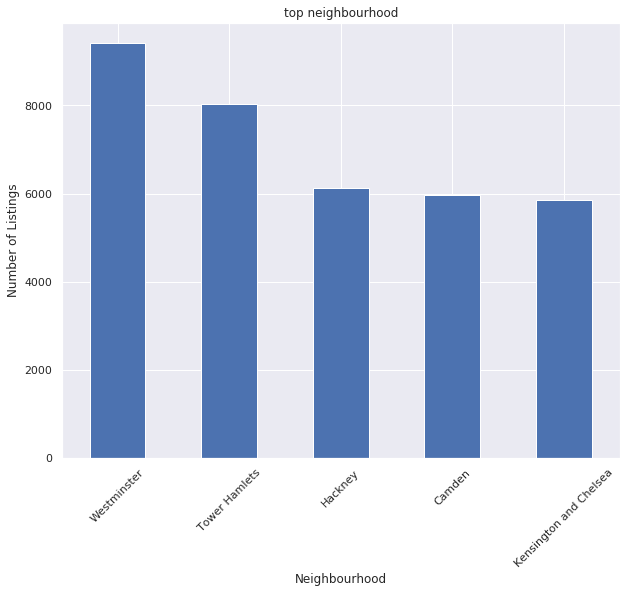

In [0]:
chart1 = top_neighbourhood.plot(kind='bar')
chart1.set_title("top neighbourhood")
chart1.set_ylabel("Number of Listings")
chart1.set_xlabel("Neighbourhood")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45);

In [0]:
print(data.price[1:10])
#While examining the price column, it can be noted that the data is in the form of a string.
#Thus removing the '$' and ".00" characters to convert it into an integer type.
data.price = data.price.apply(lambda x : (x.replace(".00", "")))
data.price = data.price.apply(lambda x : (x.replace(",", ""))) 
data.price = data.price.apply(lambda x : int(x.replace("$", ""))) 

1    $100.00
2    $300.00
3    $175.00
4     $65.00
5     $29.00
6    $147.00
7    $147.00
8     $34.00
9    $100.00
Name: price, dtype: object


In [0]:
#Lets have a look at the summary of thr price column now
data.price.describe()
#Its seen that 75% of the prices fall under $140 whereas the maximum price is $13700. Thus there are a few outliers.

count    83847.000000
mean       121.647727
std        224.883885
min          0.000000
25%         45.000000
50%         81.000000
75%        140.000000
max      13700.000000
Name: price, dtype: float64

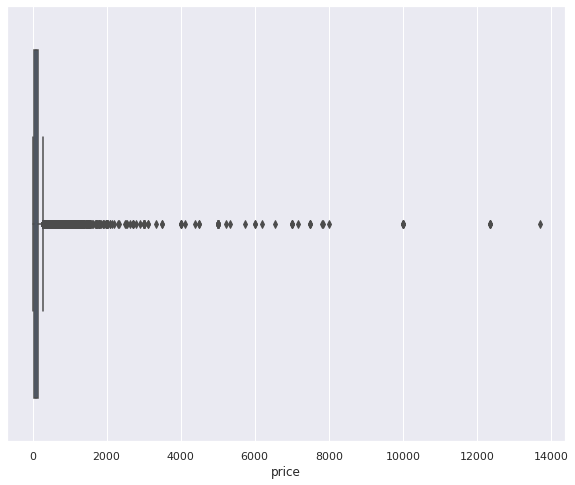

In [0]:
#Checking for outliers in the price
chart3 = sns.boxplot(x= "price", data=data)
#As we can see, there are only a few listings above $2000 and it can be considered as outliers.

In [0]:
#Removing the outliers from the dataset
data = data.loc[data.price <= 2000]
len(data)

83764

In [0]:
#Examining the price column after removing the outliers:
data.price.describe()

count    83764.000000
mean       116.616924
std        131.339692
min          0.000000
25%         45.000000
50%         81.000000
75%        139.000000
max       2000.000000
Name: price, dtype: float64

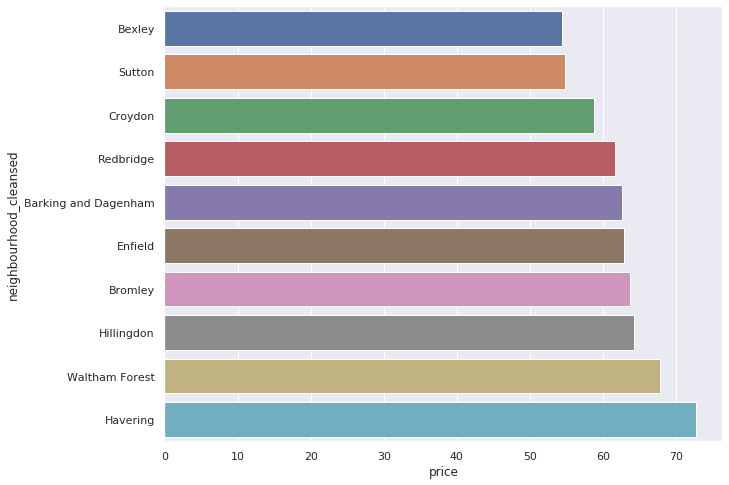

In [0]:
#Finding out the most expensive neighbourhoods by taking the mean price of each neighbourhood:
top_prices_by_neighbourhood = data.groupby('neighbourhood_cleansed').agg({'price': 'mean'}).sort_values('price').reset_index()
#plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood_cleansed", x="price", data=top_prices_by_neighbourhood.head(10))
plt.ioff()
#Thus, we can observe that Havering, Waltham Forest and Hillington are the most expensive neighbourhoods.

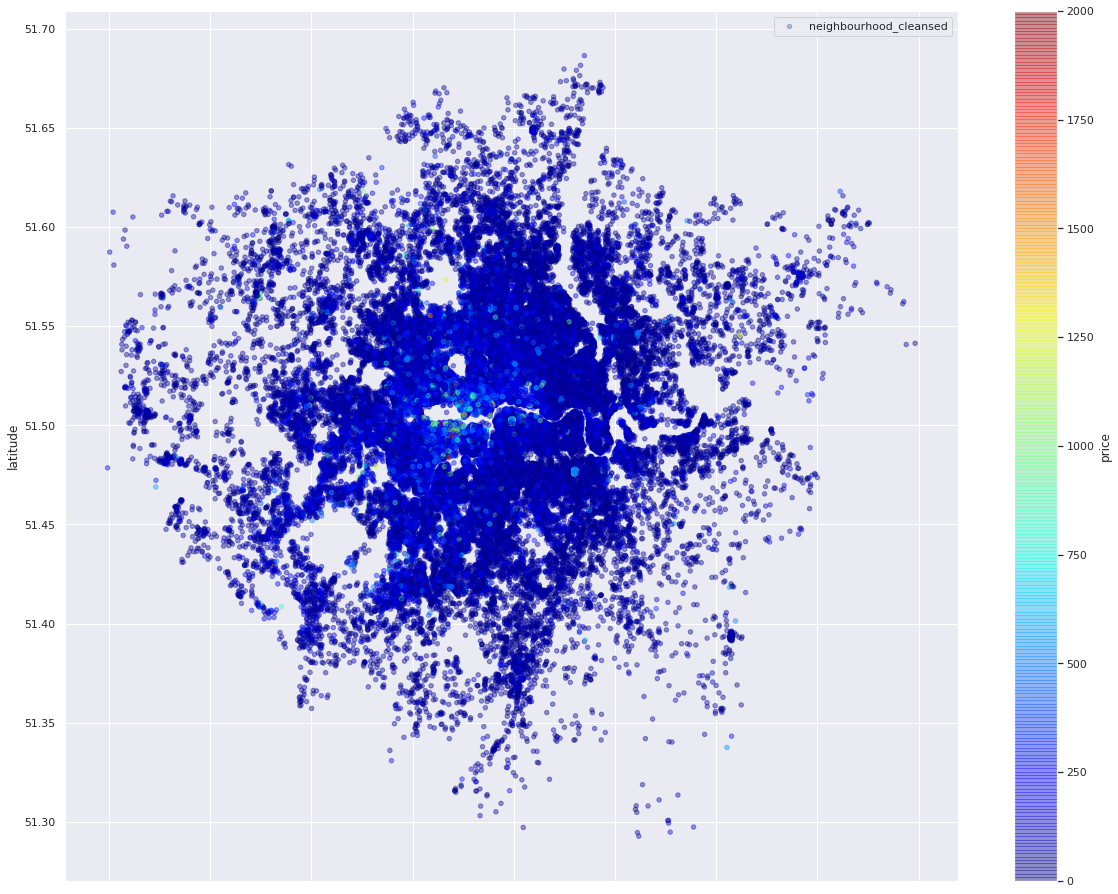

In [0]:
#Plotting the longitude and lattitude
chart4 = data.plot(kind='scatter', x='longitude', y='latitude', label='neighbourhood_cleansed', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,16))
chart4.legend();

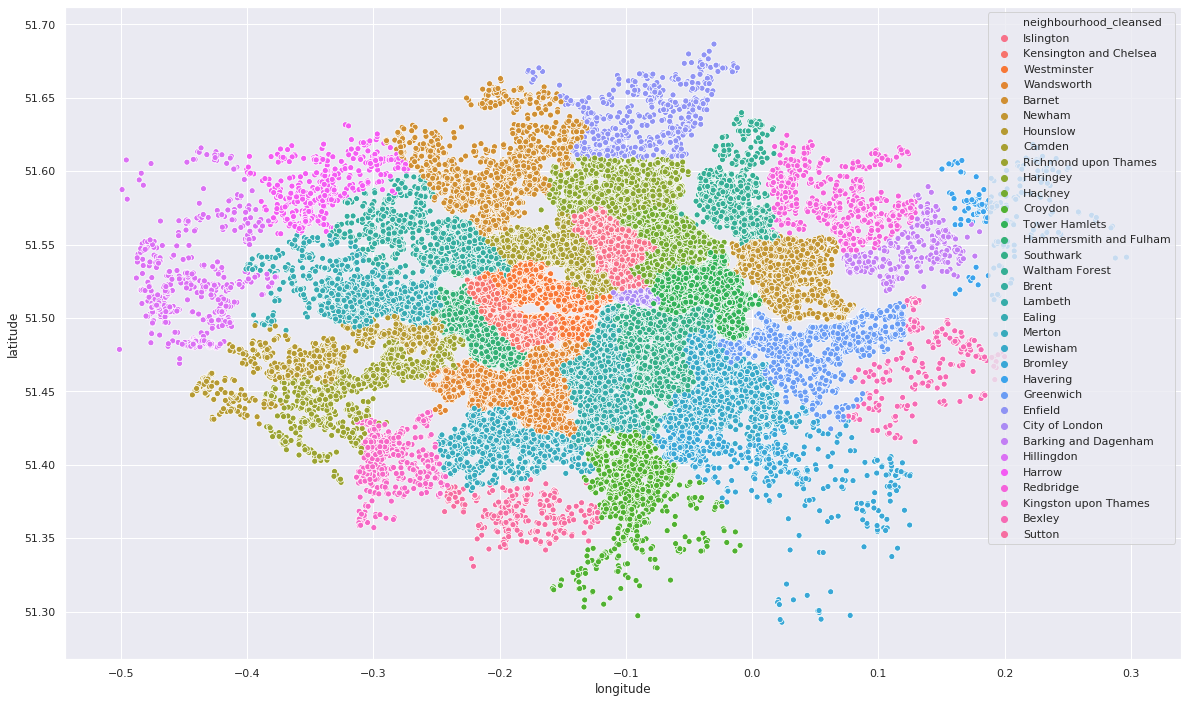

In [0]:
#Plotting the map based on the neighbourhood
plt.figure(figsize=(20,12))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_cleansed)
plt.ioff()

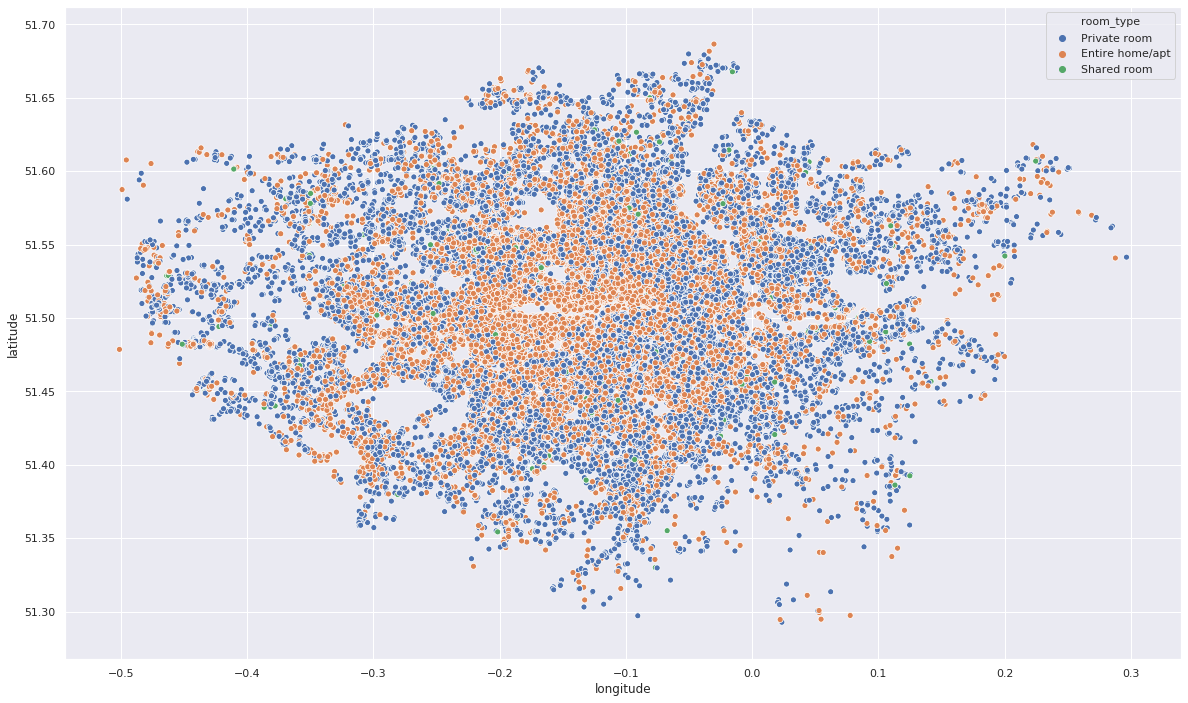

In [0]:
#Plotting the map based on the type of the room listed
plt.figure(figsize=(20,12))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.ioff()

In [0]:
#Price Prediction 
#For simplicity, considering only the quantitative features for the price prediction.

In [0]:
columns =  ["price", "neighbourhood_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "bed_type"]
df = data[columns]
features= ["neighbourhood_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "bed_type"]
categorical = ["neighbourhood_cleansed", "property_type", "room_type", "bed_type"]
df = df.dropna(axis=0, how='any')
X = df[features]
y = df["price"]

In [134]:
#veryifying if any null values are still present
df.isna().sum()


price                     0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
dtype: int64

In [135]:
X.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,Islington,51.56802,-0.11121,Apartment,Private room,2,1.0,1.0,0.0,Real Bed
1,Kensington and Chelsea,51.48796,-0.16898,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed
2,Westminster,51.52098,-0.14002,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed
3,Wandsworth,51.47298,-0.16376,Townhouse,Entire home/apt,2,1.5,1.0,1.0,Real Bed
4,Wandsworth,51.44687,-0.21874,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed


In [136]:
#Label encoding the featiues
for feature in categorical:
  le = preprocessing.LabelEncoder()
  le.fit(X[feature])
  X[feature]=le.transform(X[feature])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [137]:
X.head()

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,18,51.56802,-0.11121,1,1,2,1.0,1.0,0.0,4
1,19,51.48796,-0.16898,1,0,2,1.0,1.0,1.0,4
2,32,51.52098,-0.14002,1,0,6,2.0,3.0,3.0,4
3,31,51.47298,-0.16376,35,0,2,1.5,1.0,1.0,4
4,31,51.44687,-0.21874,1,0,4,1.0,2.0,2.0,4


In [0]:
#Splitiing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

In [139]:
#Fitting a linear Regression into the data
lm = LinearRegression()
lm.fit(X_train,y_train)
#Testing the model
predicts = lm.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 111.4733514637891
        R2 Score: 30.344011923708038
        Mean Absolute Error: 52.31957353171041
     


In [140]:
#Fitting a Gradient Boost Regressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)
#Testing the model
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 96.64753048811018
        R2 Score: 47.640213954054055
        Mean Absolute Error: 42.929745021050955
     
